<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/MLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [31]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.0
y = y.astype(int)

In [32]:
images = X.reshape(-1, 28, 28)

def extract_4x4_features(img):

    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

In [33]:
X_features = np.array([extract_4x4_features(img) for img in images])
print("New Shape:", X_features.shape)

New Shape: (70000, 49)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='tanh',
    learning_rate='constant',
    learning_rate_init=0.01,
    batch_size=64,
    max_iter=200,
    random_state=42,
    verbose=True
)

In [36]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.54554101
Iteration 2, loss = 0.34177341
Iteration 3, loss = 0.31512295
Iteration 4, loss = 0.30468361
Iteration 5, loss = 0.29952120
Iteration 6, loss = 0.29601498
Iteration 7, loss = 0.29222289
Iteration 8, loss = 0.29000469
Iteration 9, loss = 0.28861157
Iteration 10, loss = 0.28599029
Iteration 11, loss = 0.28526944
Iteration 12, loss = 0.28336451
Iteration 13, loss = 0.28120510
Iteration 14, loss = 0.28014458
Iteration 15, loss = 0.27933061
Iteration 16, loss = 0.27833227
Iteration 17, loss = 0.27711873
Iteration 18, loss = 0.27599901
Iteration 19, loss = 0.27463620
Iteration 20, loss = 0.27402012
Iteration 21, loss = 0.27299377
Iteration 22, loss = 0.27258181
Iteration 23, loss = 0.27074224
Iteration 24, loss = 0.27175877
Iteration 25, loss = 0.26828581
Iteration 26, loss = 0.26922756
Iteration 27, loss = 0.26734262
Iteration 28, loss = 0.26566411
Iteration 29, loss = 0.26518379
Iteration 30, loss = 0.26357831
Iteration 31, loss = 0.26407002
Iteration 32, los

MLPClassifier(activation='tanh', batch_size=64, hidden_layer_sizes=(10,),
              learning_rate_init=0.01, random_state=42, verbose=True)

In [37]:
train_acc = mlp.score(X_train, y_train)
test_acc  = mlp.score(X_test,  y_test)

In [38]:
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}")


Train accuracy: 0.9193
Test  accuracy: 0.9127


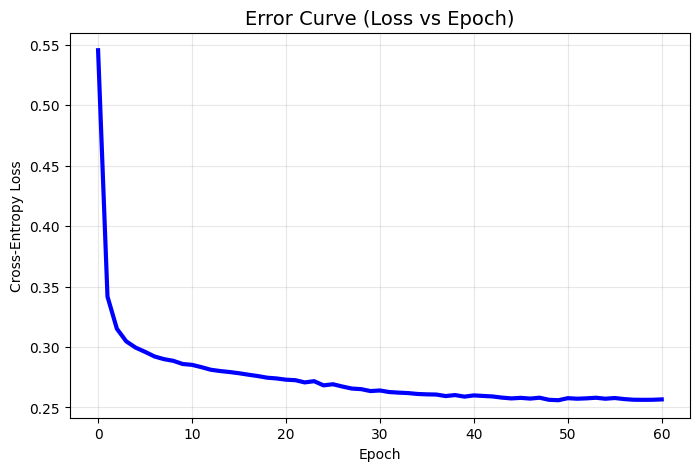

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(mlp.loss_curve_, 'b-', linewidth=3)
plt.title('Error Curve (Loss vs Epoch)', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True, alpha=0.3)
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X_noisy = X_test.copy()
n_noise = int(0.1 * len(X_test))           # 10% of test images
idx_noise = np.random.choice(len(X_test), n_noise, replace=False)

for idx in idx_noise:
    img = X_noisy[idx]                     # 49 features
    n_pixels = np.random.randint(3, 8)     # 3–7 random features
    pixels = np.random.choice(49, n_pixels, replace=False)
    noise_strength = np.random.uniform(0.03, 0.10, n_pixels)
    img[pixels] += noise_strength
    img[pixels] = np.clip(img[pixels], 0, 1)

# Predict
acc_clean = mlp.score(X_test, y_test)
acc_noisy = mlp.score(X_noisy, y_test)

Clean accuracy : 0.9127
Noisy accuracy : 0.9067
Drop           : 0.0060 (0.7%)


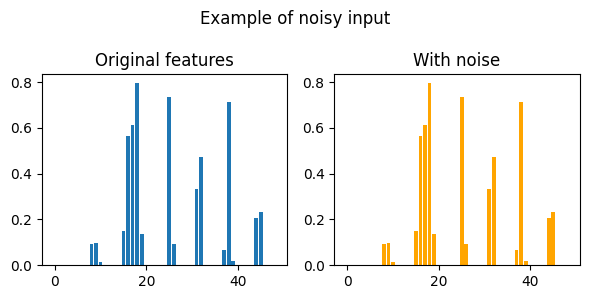

In [41]:
print(f"Clean accuracy : {acc_clean:.4f}")
print(f"Noisy accuracy : {acc_noisy:.4f}")
print(f"Drop           : {acc_clean-acc_noisy:.4f} ({(acc_clean-acc_noisy)/acc_clean:.1%})")

# Show one noisy example
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.bar(range(49), X_test[0])
plt.title('Original features')
plt.subplot(1,2,2)
plt.bar(range(49), X_noisy[0], color='orange')
plt.title('With noise')
plt.suptitle('Example of noisy input')
plt.tight_layout()
plt.show()

In [42]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from google.colab import files
uploaded = files.upload()

In [44]:
mlp_strong = MLPClassifier(
    hidden_layer_sizes=(128, 64),  # Stronger: 2 layers with more neurons
    activation='tanh',
    learning_rate='adaptive',      # Better: auto-adjusts lr
    learning_rate_init=0.01,
    batch_size=128,                # Larger batch for stability
    max_iter=300,                  # More epochs for better training
    random_state=42,
    verbose=True
)

# Train the stronger model
mlp_strong.fit(X_train, y_train)

# Print accuracies
train_acc = mlp_strong.score(X_train, y_train)
test_acc = mlp_strong.score(X_test, y_test)
print(f"\nTrain accuracy: {train_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Iteration 1, loss = 0.35607885
Iteration 2, loss = 0.21939266
Iteration 3, loss = 0.19548737
Iteration 4, loss = 0.18386991
Iteration 5, loss = 0.16878584
Iteration 6, loss = 0.16522904
Iteration 7, loss = 0.15574968
Iteration 8, loss = 0.15471655
Iteration 9, loss = 0.14920048
Iteration 10, loss = 0.14853861
Iteration 11, loss = 0.14348961
Iteration 12, loss = 0.14179069
Iteration 13, loss = 0.13928840
Iteration 14, loss = 0.13486258
Iteration 15, loss = 0.13406311
Iteration 16, loss = 0.13434380
Iteration 17, loss = 0.13389810
Iteration 18, loss = 0.12456102
Iteration 19, loss = 0.12241119
Iteration 20, loss = 0.12324499
Iteration 21, loss = 0.12205462
Iteration 22, loss = 0.12626474
Iteration 23, loss = 0.12099053
Iteration 24, loss = 0.11453879
Iteration 25, loss = 0.11721433
Iteration 26, loss = 0.11654247
Iteration 27, loss = 0.11539891
Iteration 28, loss = 0.11452758
Iteration 29, loss = 0.11499282
Iteration 30, loss = 0.11275639
Iteration 31, loss = 0.11080513
Iteration 32, los

In [45]:
def extract_4x4(img28):
    feats = []
    for i in range(0, 28, 4):
        for j in range(0, 28, 4):
            patch = img28[i:i+4, j:j+4]
            feats.append(patch.mean())
    return np.array(feats)

# Load your digits as 28x28 images and extract features
X_my = []
for i in range(10):
    im = Image.open(f"my{i}s.png").convert('L')  # Use your file names
    arr = np.array(im) / 255.0  # 28x28 array
    feats = extract_4x4(arr)  # Now 49 features
    X_my.append(feats)
X_my = np.array(X_my)  # (10, 49)
print(X_my)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  5.39215686e-03 1.22549020e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.79901961e-02 4.61029412e-01 7.88235294e-01
  5.38970588e-01 0.00000000e+00 4.90196078e-04 1.46568627e-01
  6.22794118e-01 3.06127451e-01 3.04901961e-01 4.77941176e-01
  1.10294118e-02 2.35294118e-02 4.78186275e-01 5.98039216e-02
  2.94117647e-03 8.43137255e-02 3.69362745e-01 1.07843137e-02
  7.59803922e-02 7.99754902e-01 1.83578431e-01 4.38725490e-02
  4.96568627e-01 2.39950980e-01 0.00000000e+00 4.90196078e-03
  3.34313725e-01 6.62254902e-01 7.38480392e-01 3.82843137e-01
  3.18627451e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.67647059e-03 8.33333333e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.23529412e-02
  1.44607843e-02 0.00000000e+00 4.90196078e-04 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.35294118e-01 2.14705882e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000


Fixed Predictions:
Digit 0 -> Predicted: 0 [CORRECT] Confidence: 99.2%
Digit 1 -> Predicted: 1 [CORRECT] Confidence: 99.6%
Digit 2 -> Predicted: 1 [WRONG] Confidence: 60.7%
Digit 3 -> Predicted: 3 [CORRECT] Confidence: 99.2%
Digit 4 -> Predicted: 4 [CORRECT] Confidence: 99.0%
Digit 5 -> Predicted: 5 [CORRECT] Confidence: 98.9%
Digit 6 -> Predicted: 1 [WRONG] Confidence: 75.0%
Digit 7 -> Predicted: 7 [CORRECT] Confidence: 93.9%
Digit 8 -> Predicted: 8 [CORRECT] Confidence: 83.8%
Digit 9 -> Predicted: 9 [CORRECT] Confidence: 88.1%


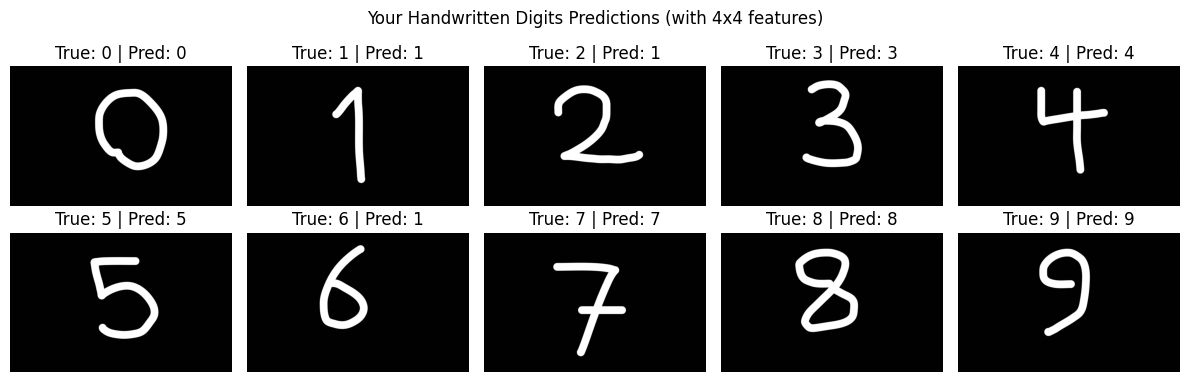

In [46]:
preds = mlp.predict(X_my)
conf = mlp.predict_proba(X_my).max(axis=1)

# Print results
print("\nFixed Predictions:")
for i in range(10):
    status = "CORRECT" if preds[i] == i else "WRONG"
    print(f"Digit {i} -> Predicted: {preds[i]} [{status}] Confidence: {conf[i]:.1%}")

# Plot with predictions
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    img = Image.open(f"my{i}.png").convert('L')
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {i} | Pred: {preds[i]}")
    plt.axis('off')
plt.suptitle("Your Handwritten Digits Predictions (with 4x4 features)")
plt.tight_layout()
plt.show()